In [6]:
import matplotlib.pyplot as plt 
import pandas as pd
!pip install pandas

In [72]:
import pandas as pd
og = pd.read_csv('spotify_songs.csv')

#We made a column for just the year
og["year"] = pd.to_datetime(og["track_album_release_date"], format="mixed", errors="coerce").dt.year

#Converting milliseconds to mins
og["mins"] = og["duration_ms"] / 60000 
og.head()
og.shape

(32833, 25)

There are 23 features, and 32,833 observations (songs). Features: track id, track name, track artist, track popularity (0-100 scale), album id, album name, album release date, playlist name, playlist id, playlist genre, key (overall pitch), loudness (-60 to 0 db scale), mode (major - 1 or minor - 0), speechiness (detects presence of spoken words) , acousticness (0.0 to 1.0 scale of whether the track is acoustic), instrumentalness (0.0 to 1.0 scale, Predicts whether a track has no vocals), liveness (presence of an audience during recording, > 0.8 means inc prob that track was performed live), valence (0.0 to 10.0 scale, decribes musical positiveness of a track) , tempo (BPM), duration (ms). 

To start, we will need to drop features we aren't testing or do not need for our goal. 

In [91]:
df = og[['track_name', 'era' ,'track_artist', 'year','track_popularity','valence_scale']]
 # The first five songs of our derived dataset. 

bins = [0, 1999, 2010, 2020] 
labels = ["1900s", "2000–2010", "2011–2020"]
og["era"] = pd.cut(df["year"], bins=bins, labels=labels)
df.head()

og["valence"] = pd.to_numeric(og["valence"], errors="coerce")
bins = [0.0,0.3,0.5,0.7, 1.0] 
labels = ["very low", "low", "high", "very high"]
og["valence_scale"] = pd.cut(og["valence"], bins=bins, labels=labels, include_lowest=True)
df.head(15)

,track_name,era,track_artist,year,track_popularity,valence_scale
0,I Don't Care (with Justin Bieber) - Loud Luxur...,2011–2020,Ed Sheeran,2019,66,high
1,Memories - Dillon Francis Remix,2011–2020,Maroon 5,2019,67,high
2,All the Time - Don Diablo Remix,2011–2020,Zara Larsson,2019,70,high
3,Call You Mine - Keanu Silva Remix,2011–2020,The Chainsmokers,2019,60,very low
4,Someone You Loved - Future Humans Remix,2011–2020,Lewis Capaldi,2019,69,very high
5,Beautiful People (feat. Khalid) - Jack Wins Remix,2011–2020,Ed Sheeran,2019,67,high
6,Never Really Over - R3HAB Remix,2011–2020,Katy Perry,2019,62,very low
7,Post Malone (feat. RANI) - GATTÜSO Remix,2011–2020,Sam Feldt,2019,69,low
8,Tough Love - Tiësto Remix / Radio Edit,2011–2020,Avicii,2019,68,low
9,If I Can't Have You - Gryffin Remix,2011–2020,Shawn Mendes,2019,67,high


We can also display info in ascending order

We want to group songs by year:

In [92]:
songs2000s = df[(df["year"] >= 2000) & (df["year"] <= 2010)]
songs2000s

songs2010s = df[(df["year"] > 2010) & (df["year"] <= 2020)]
songs2010s

songs1900s = df[df["year"] < 2000]
songs1900s

,track_name,era,track_artist,year,track_popularity,valence_scale
749,We like to Party! (Six Flags),1900s,Vengaboys,1998,51,very high
750,Coco Jamboo - Radio Version,1900s,Mr. President,1996,18,very high
751,Blue (Da Ba Dee),1900s,Eiffel 65,1999,16,very high
753,What Is Love,1900s,Haddaway,1993,70,very high
754,Scatman (ski-ba-bop-ba-dop-bop),1900s,Scatman John,1995,10,very high
...,...,...,...,...,...,...
31690,"I Feel Love - 12"" Version",1900s,Donna Summer,1979,5,very high
31694,Dance Freak,1900s,Chain Reaction,1980,29,very high
31703,Hold Tight,1900s,Gino Soccio,1994,33,very high
31704,Janice,1900s,Skip Mahoney,1993,31,very high


C:\Users\CmeKa\AppData\Local\Temp\ipykernel_33672\3003601188.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop = df.groupby("era")["track_popularity"].mean() #the average popularity from songs in each era


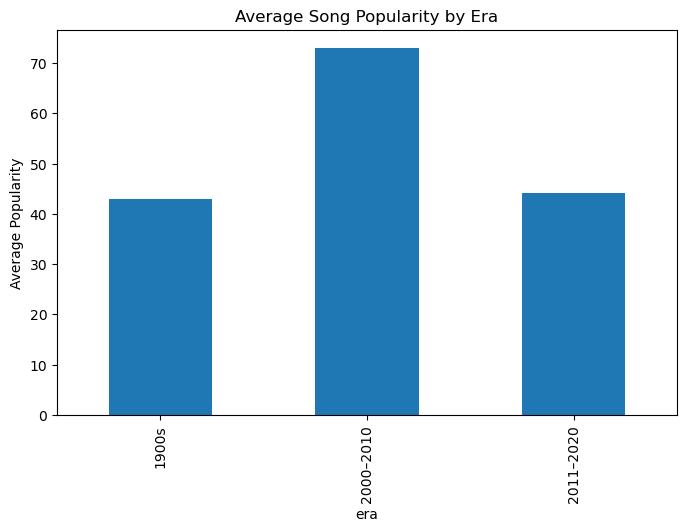

In [93]:
#PLOTS - plotting popularity vs. 1900s
avg_popularity = df.groupby("year")["track_popularity"].mean()
avg_popularity.plot(kind="bar")

avg_pop = df.groupby("era")["track_popularity"].mean() #the average popularity from songs in each era
avg_pop.plot(kind="bar", figsize=(8,5))
plt.ylabel("Average Popularity")
plt.title("Average Song Popularity by Era")
plt.show()


C:\Users\CmeKa\AppData\Local\Temp\ipykernel_33672\2551510791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgpop = df.groupby("valence_scale")["track_popularity"].mean() #the average popularity from songs in each era


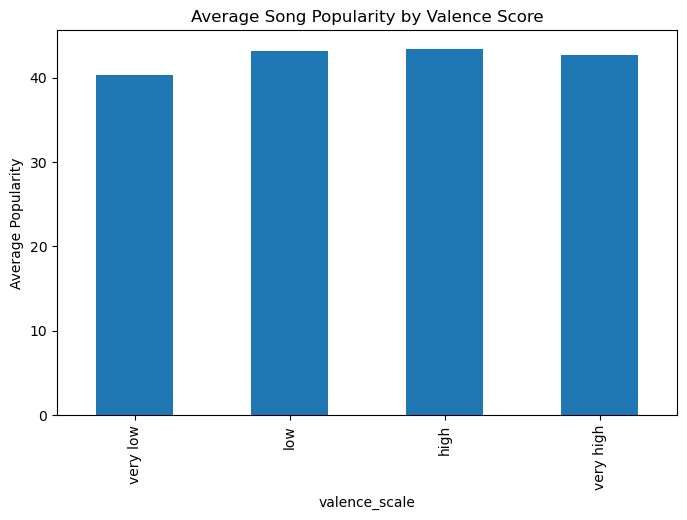

In [94]:
avgpop = df.groupby("valence_scale")["track_popularity"].mean() #the average popularity from songs in each era
avgpop.plot(kind="bar", figsize=(8,5))
plt.ylabel("Average Popularity")
plt.title("Average Song Popularity by Valence Score")
plt.show()

In [95]:
#Most popular tracks:
top_tracks = df.groupby("track_name")["track_popularity"].max().sort_values(ascending = False)
top_tracks

track_name
Dance Monkey                      100
ROXANNE                            99
Circles                            98
Blinding Lights                    98
Memories                           98
                                 ... 
Upgraded                            0
Ipanema - Original Mix              0
Invitation (feat. Yade Lauren)      0
Invincible - Radio Edit             0
I'm Gonna Be Alright                0
Name: track_popularity, Length: 23449, dtype: int64